In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#улучшим качество изображений
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('df_result.csv')

In [4]:
df

,id,number of rooms,price(rub),metro,time(min),total area(м²),year of completion,kitchen area(м²),ceiling height(м),type of house,WC,apartment floor,total floors,readiness,num of elevators,type of elevators,ppm(rub),Okrug
0,283969757,1,16042265,Савёловская,13,32.20,2025,18.1,3.0,Монолитный,1,4,22,Без отделки,1,пассажирский,498206,Северный административный округ
1,284037342,1,16297308,Технопарк,17,43.50,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,374650,Южный административный округ
2,266826884,1,17086799,Дмитровская,8,32.10,2025,13.4,3.0,Монолитный,1,11,36,Чистовая,3,пассажирский,532299,Северо-Восточный административный округ
3,284807290,1,18669730,Преображенская площадь,5,46.59,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,400723,Восточный административный округ
4,264958724,1,19015154,Марьина роща,8,43.45,2024,18.1,3.0,Монолитный,1,38,55,Предчистовая,4,пассажирский,437633,Северо-Восточный административный округ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,284759598,2,10000000,Солнцево,10,54.20,2023,16.2,3.1,Монолитный,1,7,24,Без отделки,1,пассажирский,184501,Западный административный округ
1481,284593318,2,11000000,Ольховая,20,52.50,2022,11.7,2.7,Монолитный,1,7,15,Чистовая,1,пассажирский,209523,Новомосковский административный округ
1482,283555890,1,7591477,Саларьево,19,32.17,2024,9.7,2.8,Монолитный,1,4,18,Без отделки,1,пассажирский,235980,Новомосковский административный округ
1483,284961268,1,9220000,Ольховая,9,40.50,2022,18.1,2.8,Панельный,1,8,14,Чистовая,1,пассажирский,227654,Новомосковский административный округ


В дальнейших своих действиях мы хотим понять, что именно влияет на формирование цены и в какой степени, для этого построим гистограммы и функции плотности распределения. 

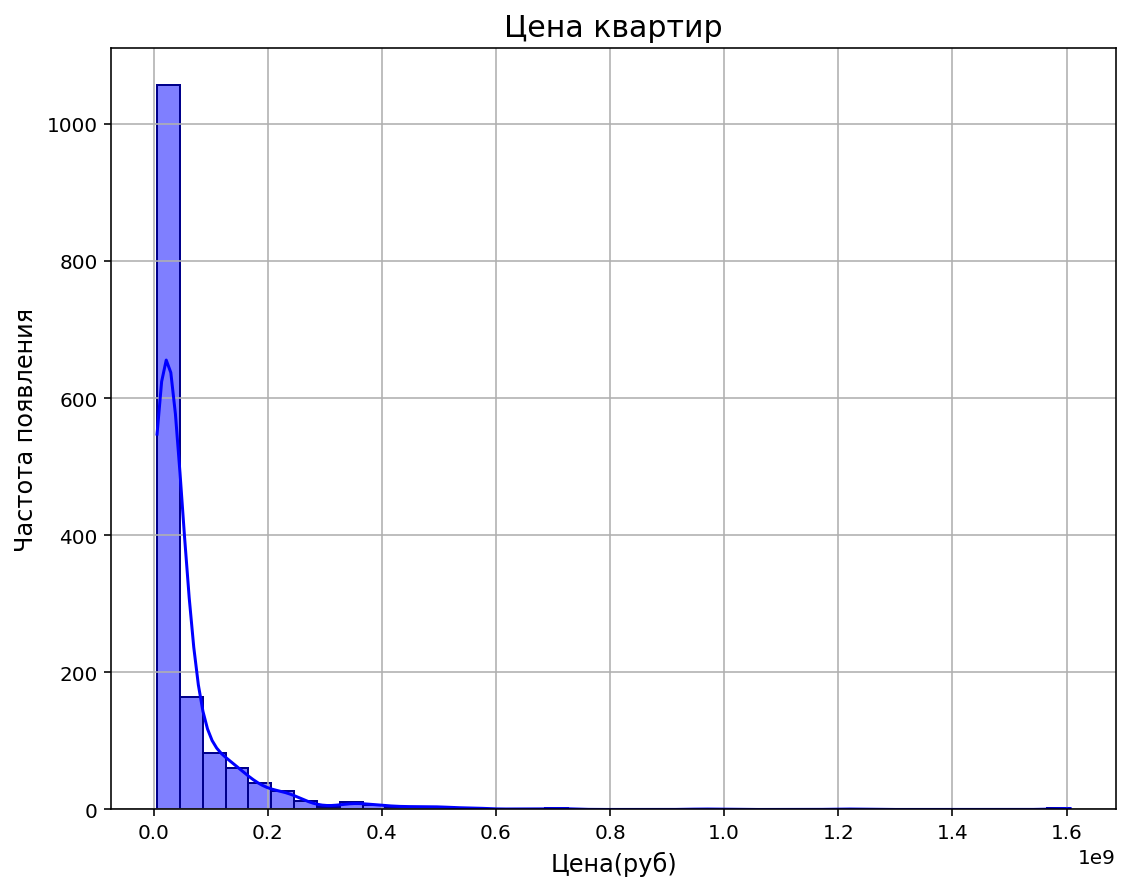

In [5]:
fig, axes = plt.subplots(figsize=(9, 7))

axes.set_title("Цена квартир", fontsize=15)
axes.set_xlabel("Цена(руб)", fontsize=12)
axes.set_ylabel("Частота появления", fontsize=12)
sns.histplot(df['price(rub)'] ,bins=40, color='blue', edgecolor='darkblue', kde= True, ax=axes)

plt.grid(axis='x', which='major')
plt.grid(axis='y', which='major')

Основная масса объявлений, представляет собой квартиры до ±25 млн. руб, так как это наиболее реальный ценник, за который люди, при переезде в Москву/смене жилья, могут позволить себе взять квартиру, и застройщик, учитывая это, выставляет соответствующий ценник. 

## Рассмотрим дополнительные характеристики, которые потенциально могут влиять на ценообразование

### Влиянение метро

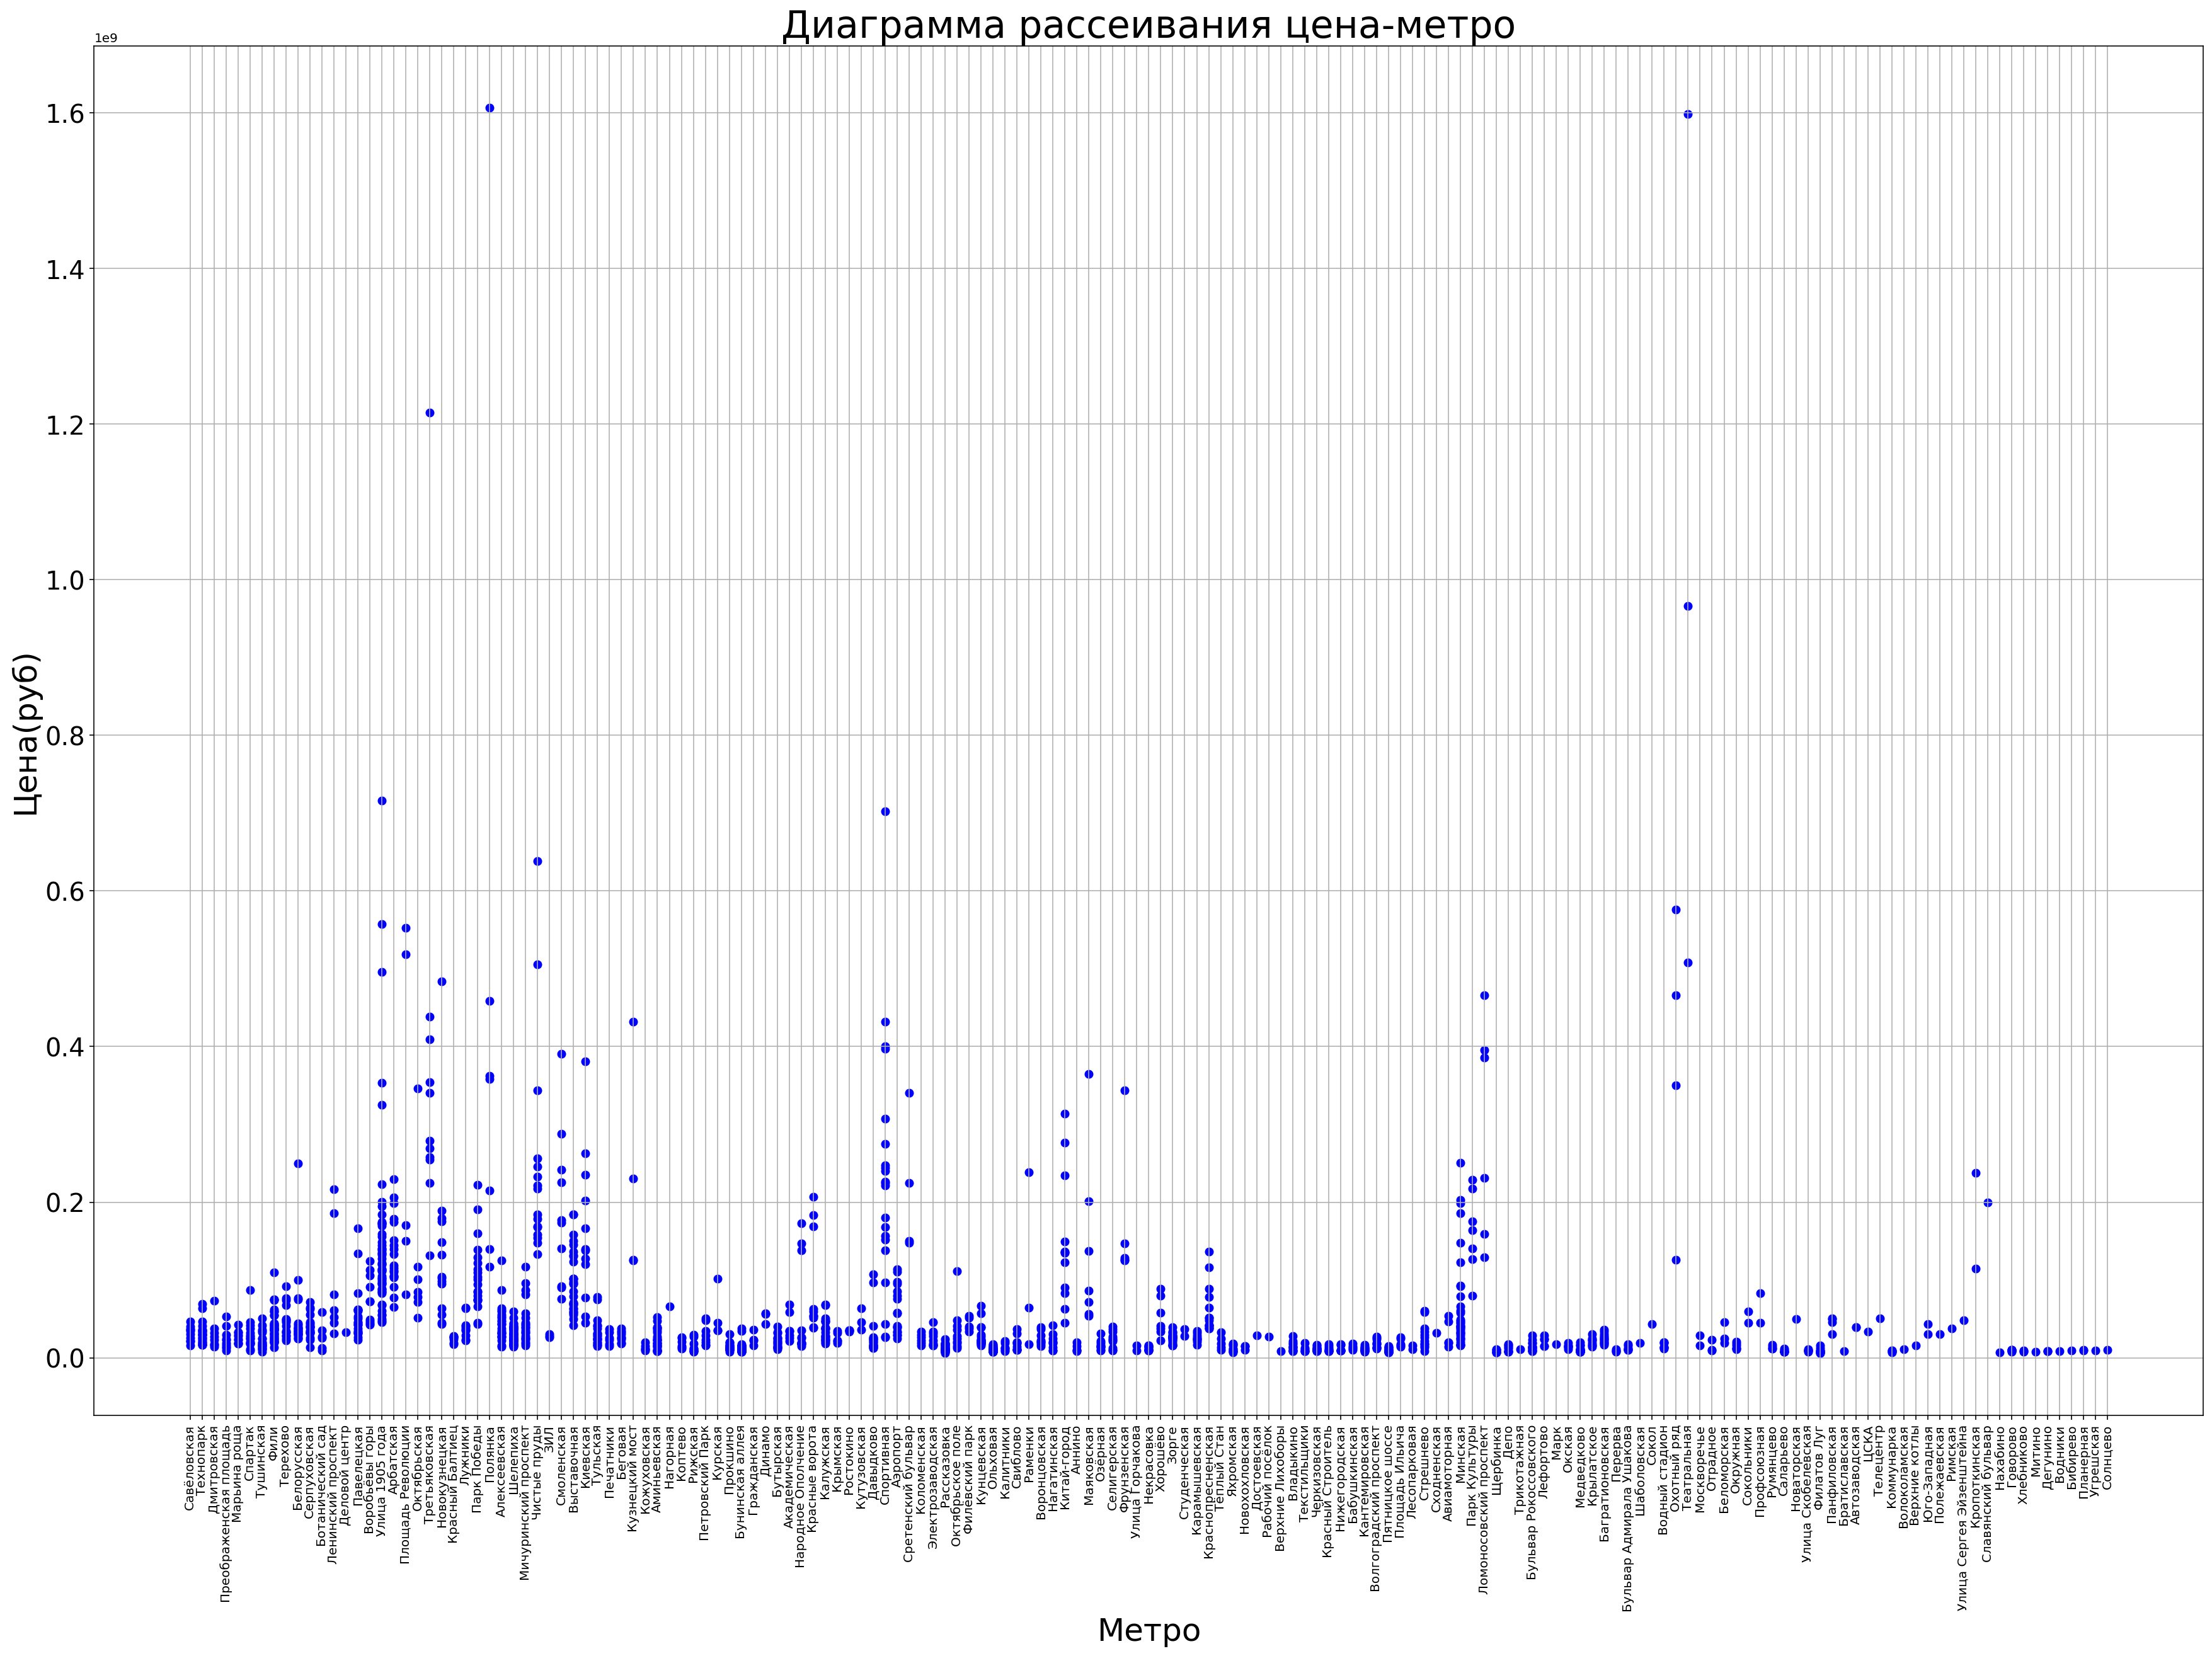

In [6]:
plt.figure(figsize = (30, 20))

plt.title('Диаграмма рассеивания цена-метро', fontsize=30)
plt.xlabel('Метро', fontsize=25)
plt.ylabel('Цена(руб)', fontsize=25)
plt.scatter(x = df.metro, y = df['price(rub)'], color='blue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(rotation = 90)
plt.grid();

Исходя из полученного графика, можно сделать вывод о том, что между ценой квартиры и метро наблюдается взаимосвязь. Также, можно заметить некоторые выбросы, что говорит о том, что на некоторых станциях цены значительно выше рынка.

При покупке квартиры очень важно ее расположение. Зачастую, покупатели рассматривают квартиры, которые находятся вблизи определенных станций метро. Рассмотрим распределение квартир по близлежащим к ним станциям место.

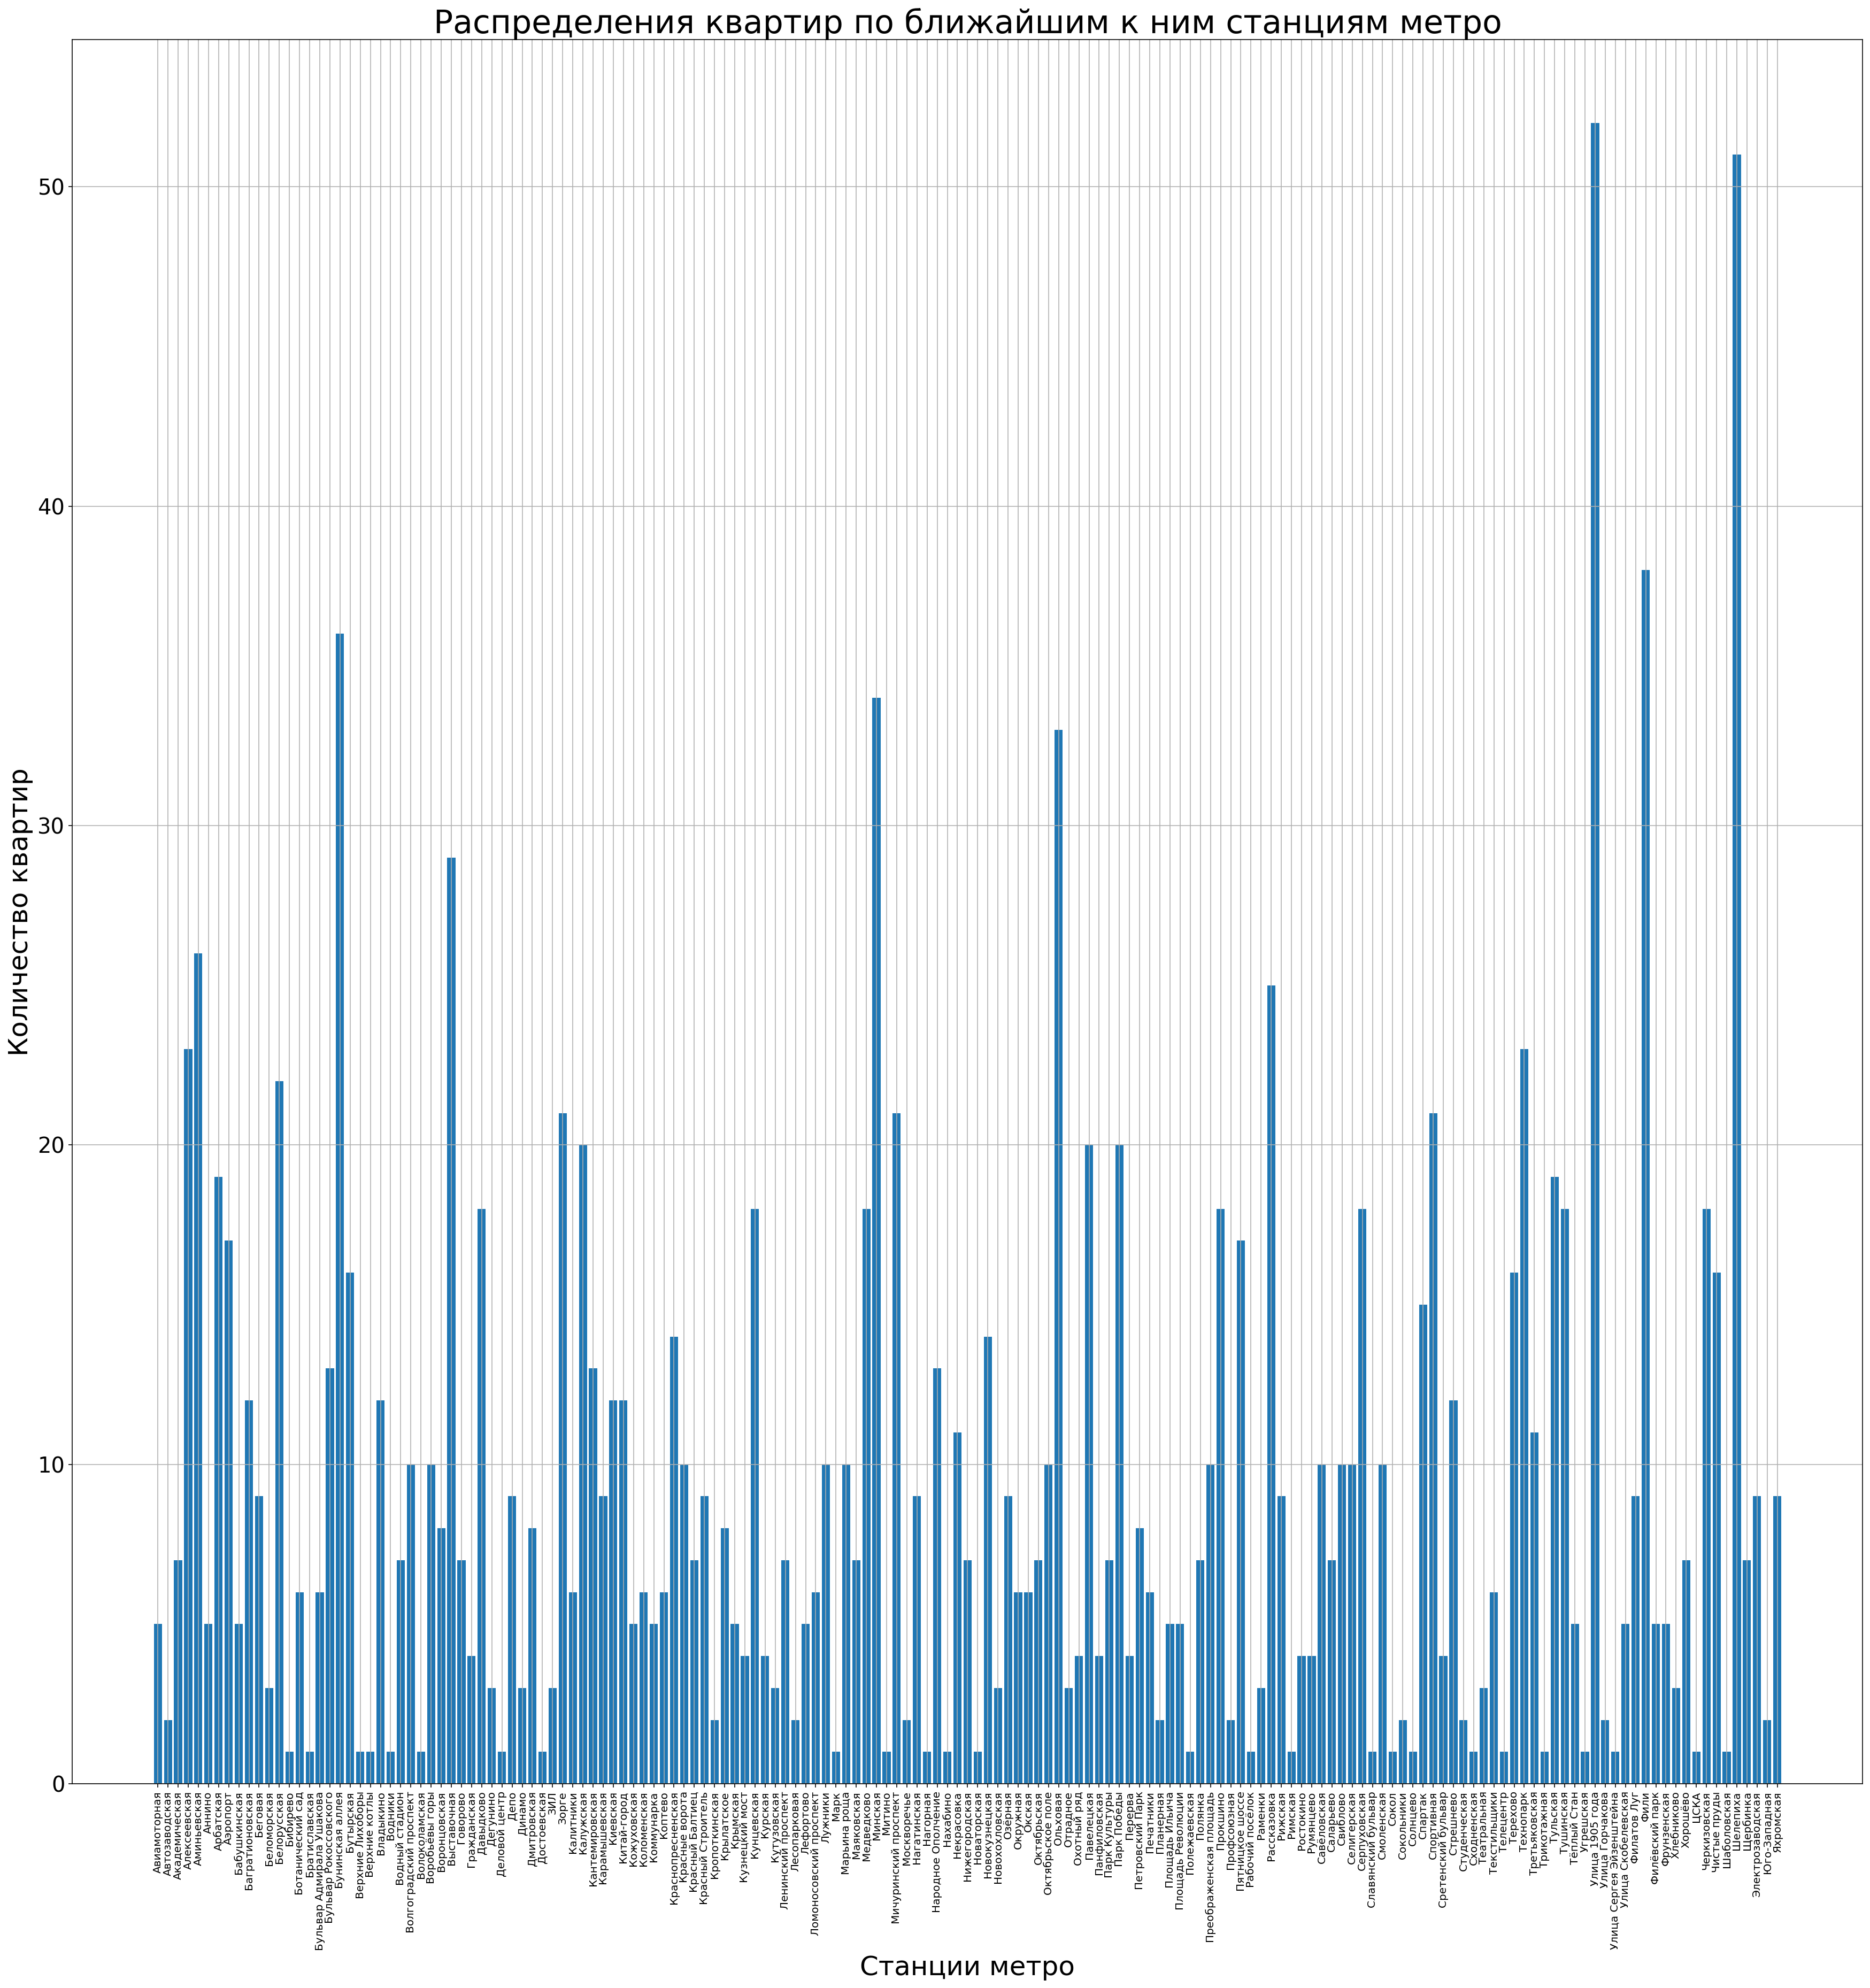

In [7]:
station_counts = df.groupby('metro')['id'].count()

plt.figure(figsize = (30, 30))
plt.title('Распределения квартир по ближайшим к ним станциям метро', fontsize=30)
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Станции метро', fontsize=25)
plt.ylabel('Количество квартир', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(rotation = 90)

plt.grid()
plt.show()

Гистограмма показала, что наибольшее количество квартир, в соответствии с информацией из объявлений, находятся неподалеку от станций метро: Улица 1905 года и Шелепиха(50+ по каждому). Стоит отметить, что лидирующие станции метро, а также многие другие расположены в пределах МКАД, что является наиболее привлекательным фактором для покупателей, так как это упращает их обыденные передвижения. Наименьшее количество квартир расположено вблизи таких станций метро, как: Бибирево, Братиславская, Верхние Лихоборы, Верхние котлы, Водники и тд. 

### Влияние расстояния до метро

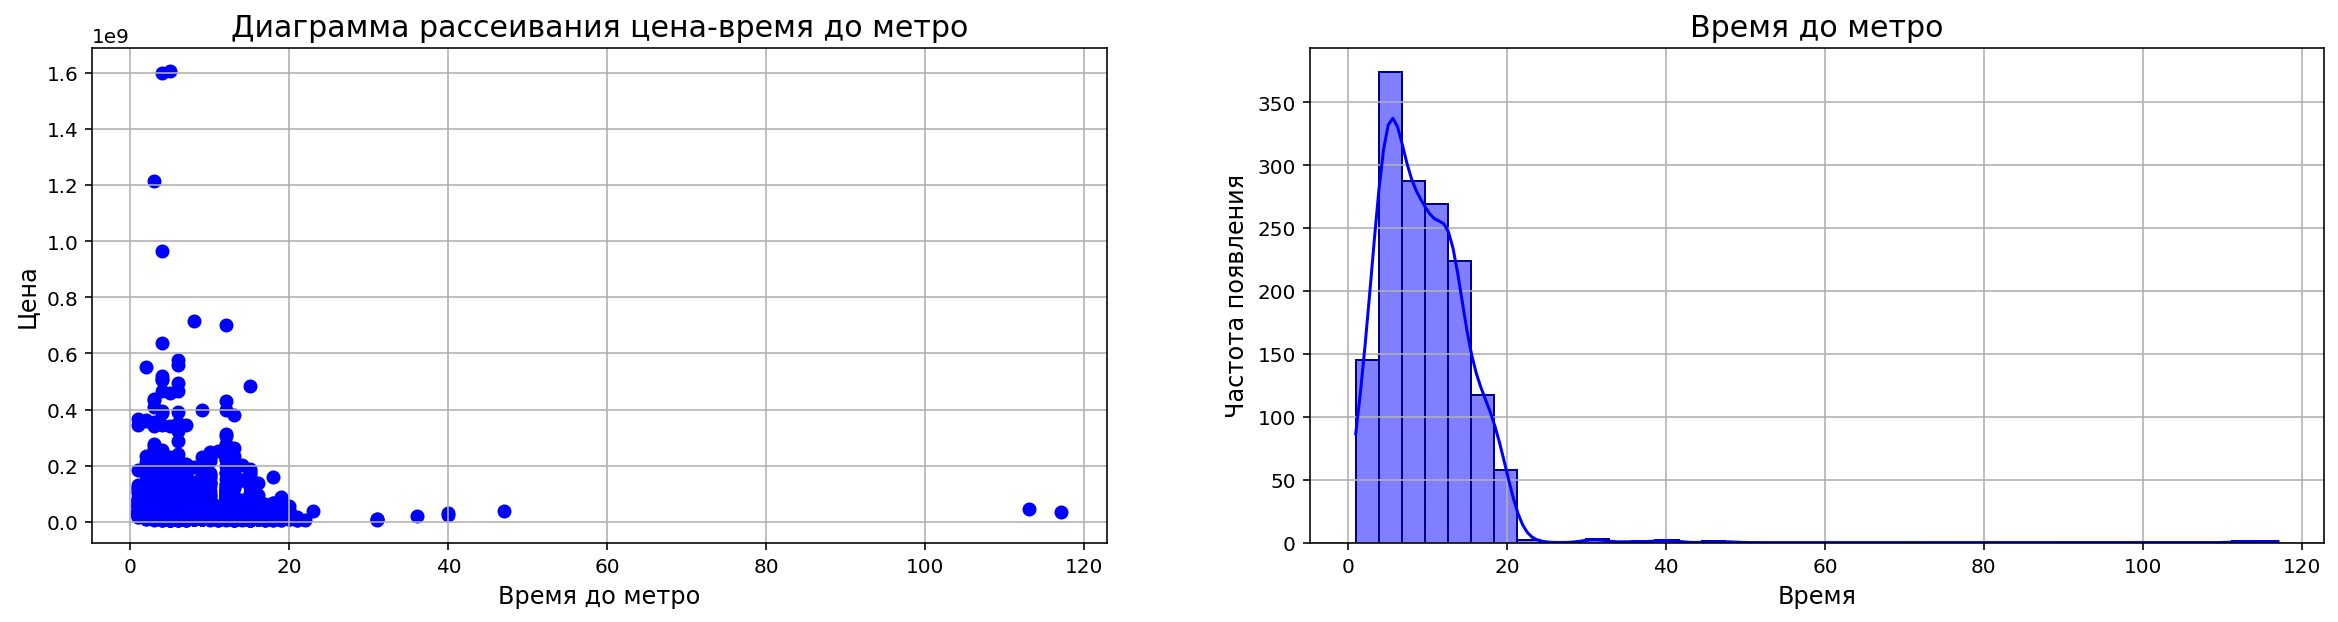

In [36]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Диаграмма рассеивания цена-время до метро', fontsize=15)
plt.xlabel('Время до метро', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.scatter(x = df['time(min)'], y = df['price(rub)'], color='blue')
plt.grid()

plt.subplot(2, 2, 2)
plt.title("Время до метро", fontsize=15)
plt.xlabel("Время", fontsize=12)
plt.ylabel("Частота появления", fontsize=12)
sns.histplot(df['time(min)'] ,bins=40, color='blue', edgecolor='darkblue', kde= True)
plt.grid()

plt.show()

Можно заметить, что чем меньше расстояние до метро, тем выше цена, эта закономерномть объясняется удобной мобильностью жильцов при покупке квартиры, это упрощает будущие передвижения, люди ежедневно затрачивают меньше времени на дорогу.

Опираясь на данный факт, застройщики стараются подбирать землю для застройки где по близости либо уже есть станция метро, либо потенциально, оно должно застроиться(расширение веток/открытие новых линий), поэтому частота появления объявлений с расстоянием 10 минут и меньше наиболее высоая.

### Влияние количества комнат

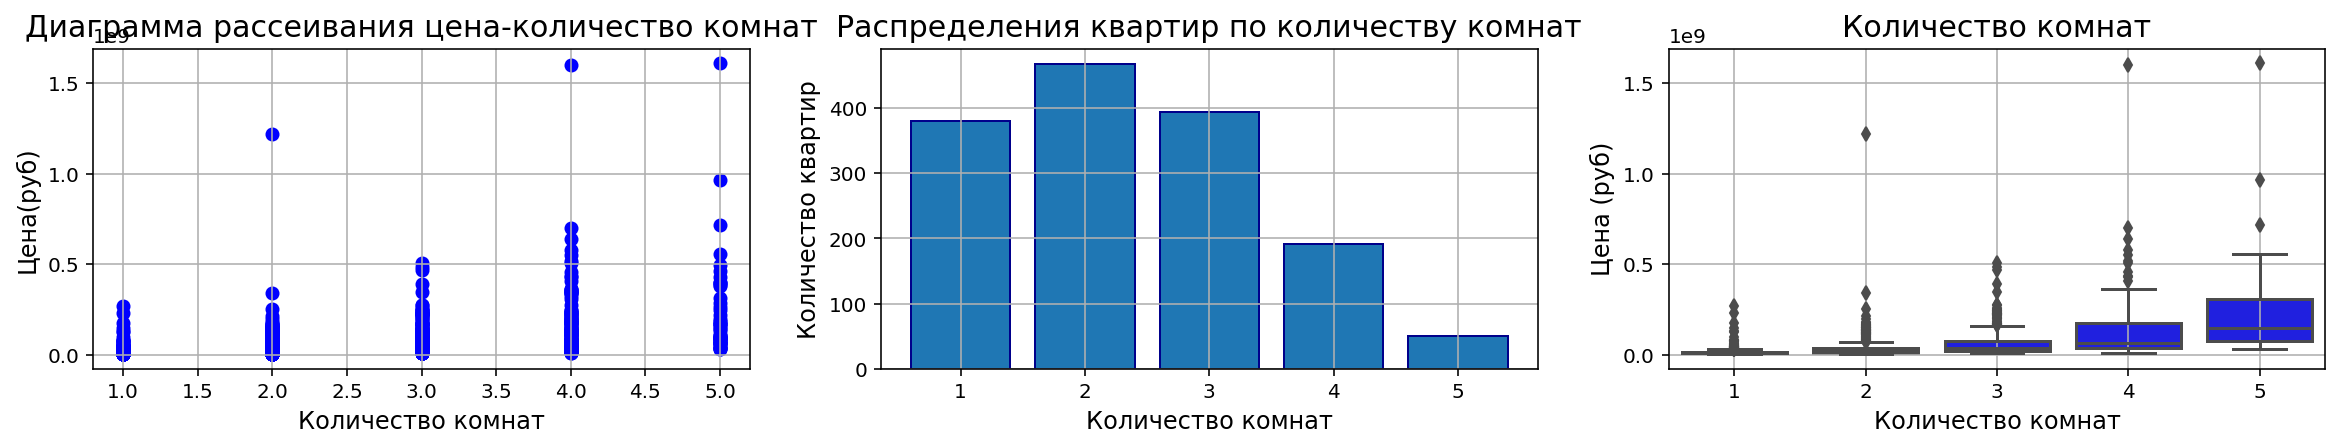

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
plt.title('Диаграмма рассеивания цена-количество комнат', fontsize=15)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x=df['number of rooms'], y=df['price(rub)'], color='blue')
plt.grid()

plt.subplot(3, 3, 2)
station_counts = df.groupby('number of rooms')['id'].count()
plt.title('Распределения квартир по количеству комнат', fontsize=15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

plt.subplot(3, 3, 3)
plt.title('Количество комнат', fontsize=15)
sns.boxplot(data=df, x='number of rooms', y='price(rub)', color='blue')
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.grid()

plt.show()

Исходя из полученных графиков, можно заметить, что с увеличением количества комнат, цена квартиры растет, что было вполне ожидаемо, так как вероятнее всего параллельно растет и метраж. Можно заметить, что выборка содержит выбросы в виде слишков высокой цены, что может объясняться наличием других "выиграшных" признаков у той или иной квартиры.

Более 400 квартир имеют 2 комнаты, что объясняется тем, что в Москве очень высокие цены на недвижимость и зачастую люди ориентированы на покупку 2-х комнатных квартир, так как это самый оптимальный вариант для будущего комфортного жилья.

Из ящика с усами следует, что несмотря на то, что, что как писалось раннее, цены растут с увеличением количества комнат, есть квартиры с меньшим количеством комнат, которые стоят больше чем средние значения квартир с большим числом комнат, что также объясняется другими выигрышными признаками.

### Влияние площади

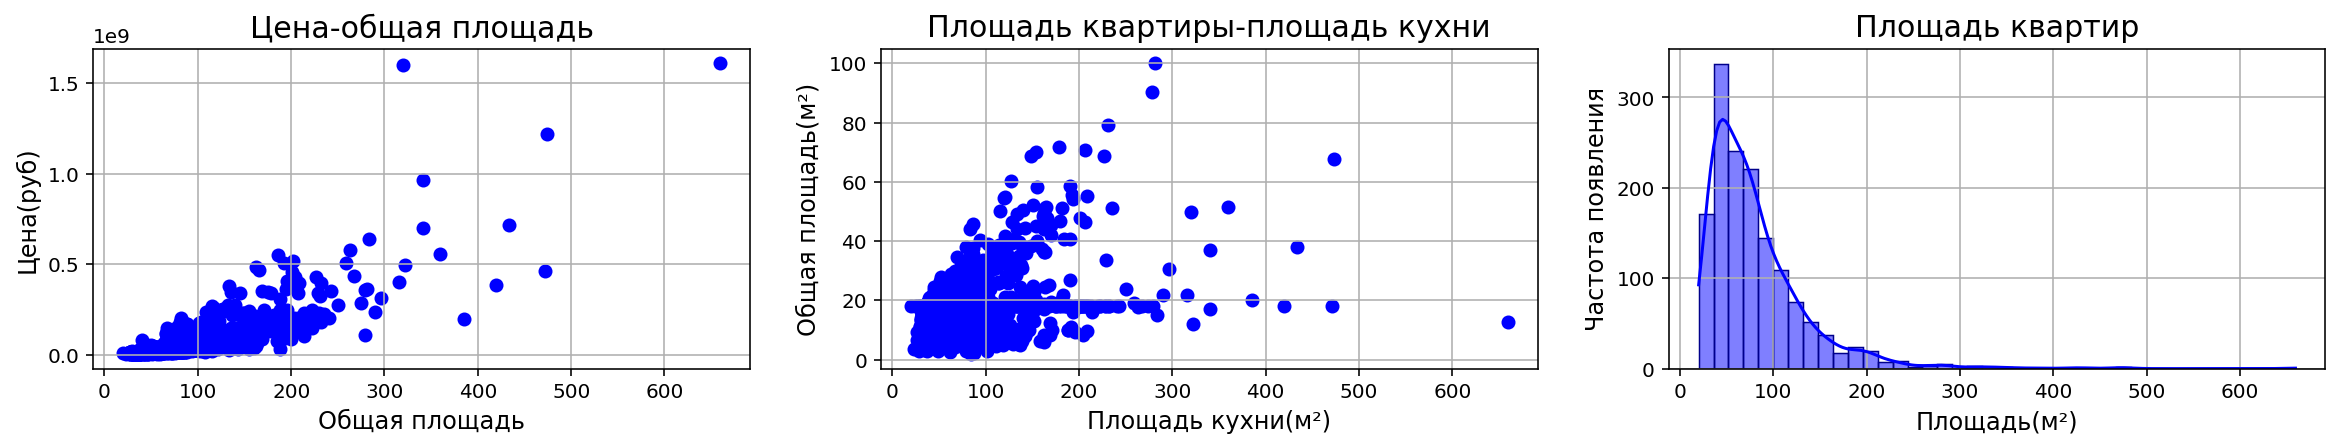

In [23]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
plt.title('Цена-общая площадь', fontsize=15)
plt.xlabel('Общая площадь', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x = df['total area(м²)'], y = df['price(rub)'], color='blue')
plt.grid()

plt.subplot(3, 3, 2)
plt.title('Площадь квартиры-площадь кухни', fontsize=15)
plt.xlabel('Площадь кухни(м²)', fontsize=12)
plt.ylabel('Общая площадь(м²)', fontsize=12)
plt.scatter(x = df['total area(м²)'], y = df['kitchen area(м²)'], color='blue')
plt.grid()

plt.subplot(3, 3, 3)
plt.title("Площадь квартир", fontsize=15)
plt.xlabel("Площадь(м²)", fontsize=12)
plt.ylabel("Частота появления", fontsize=12)
sns.histplot(df['total area(м²)'] ,bins=40, color='blue', edgecolor='darkblue', kde= True)
plt.grid()

plt.show()

Можно заметить, что между ценой квартиры и общей площадью наблюдается положительная линейная взаимосвязь. Чем больше цена, тем выше потенциально может оказаться общая площадь квартиры. Этот же вывод касается площади кухни, так как одним из весомых факторов для покупателей, при покупке квартиры, является метраж кухни. Заметим, что наиболее часто встречающийся метраж варьируется от 50 до 60 кв.м., так как, как мы отмечали раннее, это самый оптимальный вариант для молодых семей и в целом людей, кто переезжает в мегаполис и не готов тратить на жилье большие суммы. 

### Общее количество этажей

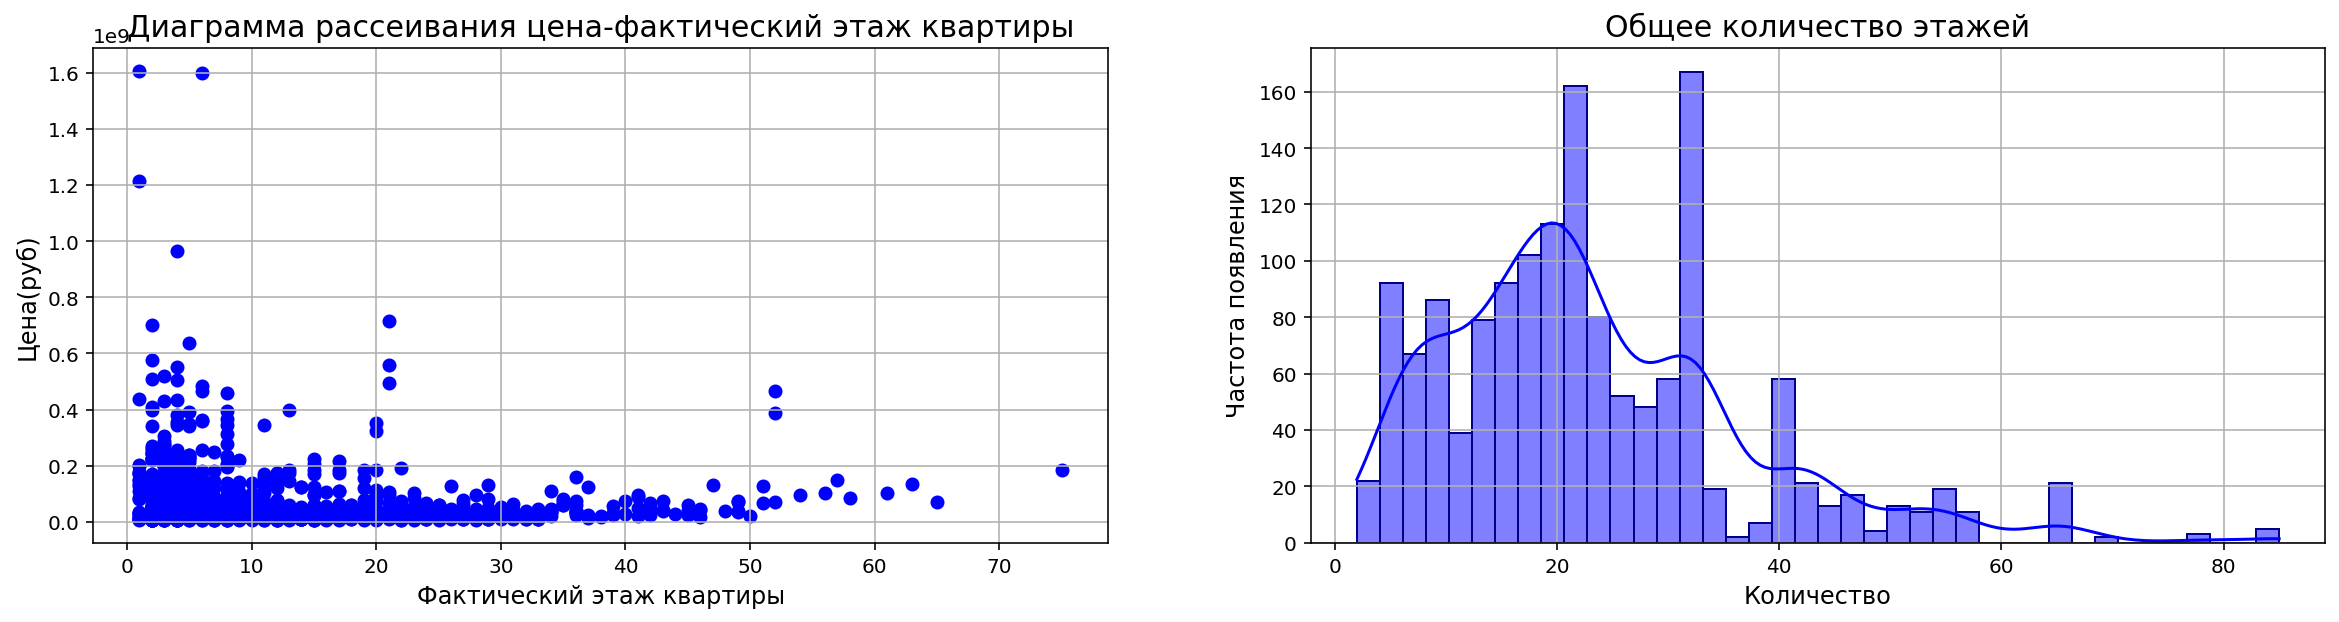

In [26]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Диаграмма рассеивания цена-фактический этаж квартиры', fontsize=15)
plt.xlabel('Фактический этаж квартиры', fontsize=12)
plt.ylabel('Цена(руб)', fontsize=12)
plt.scatter(x = df['apartment floor'], y = df['price(rub)'], color='blue')
plt.grid()

plt.subplot(2, 2, 2)
plt.title("Общее количество этажей", fontsize=15)
plt.xlabel("Количество", fontsize=12)
plt.ylabel("Частота появления", fontsize=12)
sns.histplot(df['total floors'] ,bins=40, color='blue', edgecolor='darkblue', kde= True)
plt.grid()

plt.show()

В современном мире большинство жилых домов имеют более 20 этажей, что мы и можем увидеть на гистограме. Основная часть квартир находится в домах, где количество этажей от 3 до 33. Хотя это не предел, в некоторых жилых комплексов количество этажей достигает 80+.

### Информация о доме

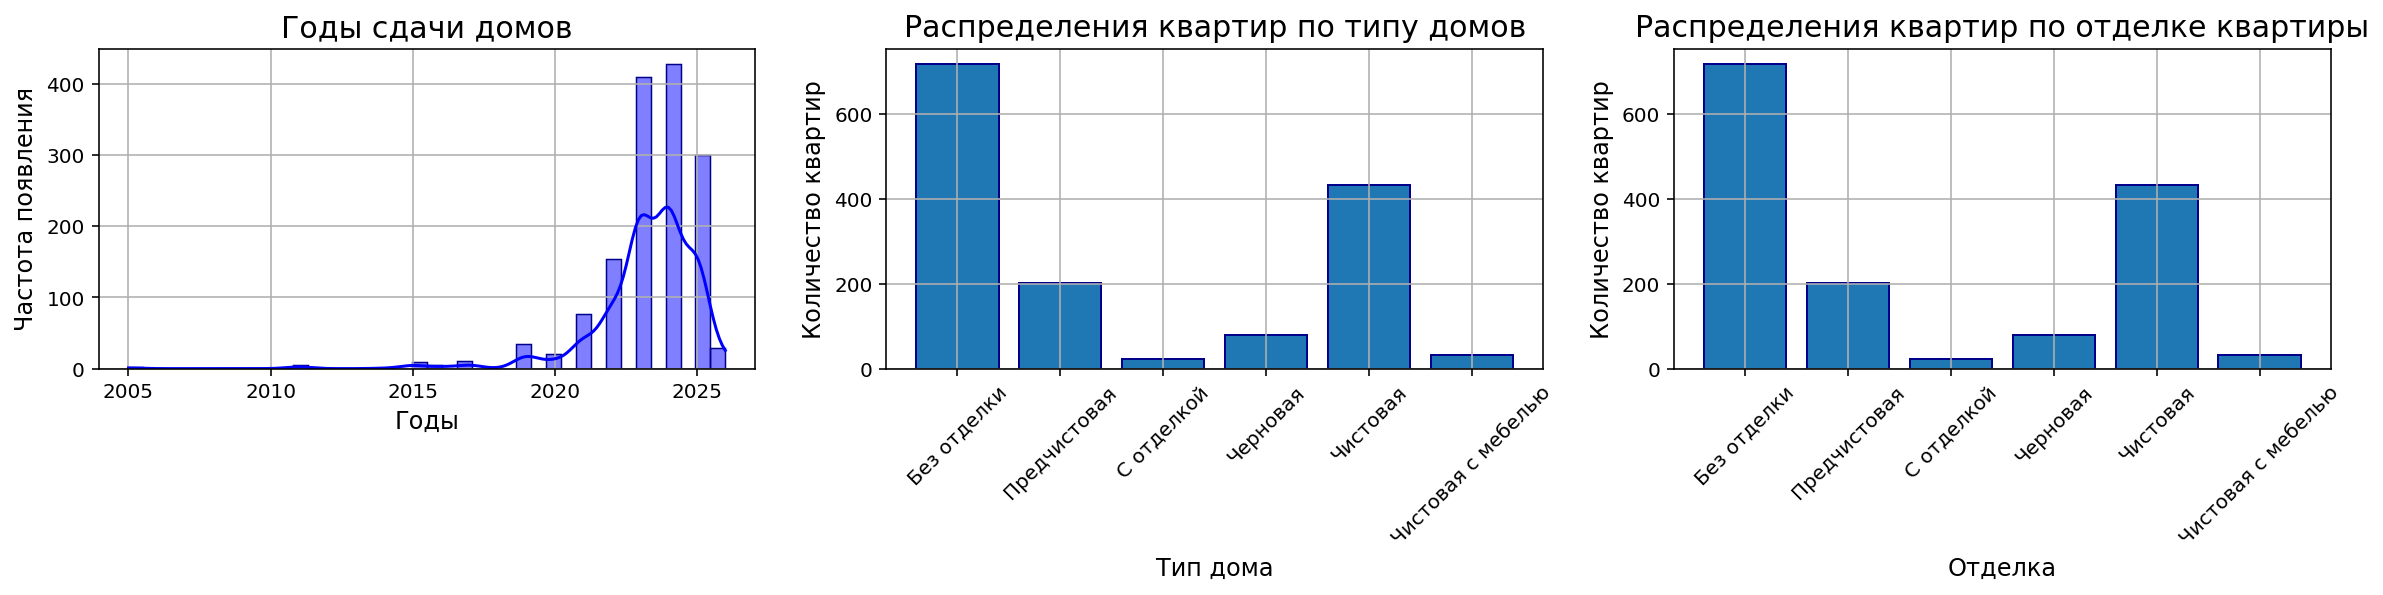

In [35]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
plt.title("Годы сдачи домов", fontsize=15)
plt.xlabel("Годы", fontsize=12)
plt.ylabel("Частота появления", fontsize=12)
sns.histplot(df['year of completion'], bins=40, color='blue', edgecolor='darkblue', kde= True)
plt.grid()

plt.subplot(3, 3, 2)
plt.title('Распределения квартир по типу домов', fontsize = 15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Тип дома', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(3, 3, 3)
station_counts = df.groupby('readiness')['id'].count()
plt.title('Распределения квартир по отделке квартиры', fontsize = 15)
plt.bar(station_counts.index, station_counts.values, edgecolor='darkblue')
plt.xlabel('Отделка', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid()

plt.show()

Продолжая тему о современности построек, стоит отметить, что практически все квартиры находятся в домах, которые были сданы после 2020 года. А так как Москва очень активно застраивается, то более 400 домов будут сданы в 2023-2024 году, и 300 в 2025. Однако квартиры уже выставляются на продажу и пользуются высоким спросом, так как на этапе застройки жилых комплексов цена значительно ниже, нежели уже в запущенных. Менее 5 квартир находятся в домах 2005/2010 года сдачи.

Исходя из того, что писалось выше, о том что большинство домов еще не введены в эксплуатацию, вполне ожидаемо, что большая часть квартир еще без отделки.

Подавляющая часть домов монолитные, так как монолитные дома наиболее долговечны и могут стоять 100–150 лет(по мнению экспертов), подобная конструкция не пропускает влагу и ветер, а также устойчива к землетрясениям.